In [1]:
import matplotlib.pyplot as plt
import sklearn.datasets as ds
import seaborn as sns
import numpy as np

In [2]:
from sklearn.linear_model import LogisticRegression

In [ ]:
#https://tianchi.aliyun.com/course/278/3413

参数：
+ penalty：默认: ‘l2’在调参时如果我们主要的目的只是为了解决过拟合
  一般penalty选择L2正则化就够了。但是如果选择L2正则化发现还是过拟合，即预测效果差的时候，
  就可以考虑L1正则化。另外，如果模型的特征非常多，我们希望一些不重要的特征系数归零，从而让模型系数稀疏化的话，也可以使用L1正则化
  L1正则化仅可用于liblinear跟saga
+ C：正则化强度的倒数，默认1.0，C越小，即正则化强度越大，惩罚越重，对参数限制越大，不容易过拟合
+ solver:
    + liblinear：默认方法，使用了开源的liblinear库实现，内部使用了坐标轴下降法来迭代优化损失函数. 
    + lbfgs/newton-cg:拟牛顿法的一种，利用损失函数二阶导数矩阵即海森矩阵来迭代优化损失函数。
    + sag:随机平均梯度下降法，和普通梯度下降法的区别是每次迭代仅仅用一部分的样本来计算梯度，适合于样本数据多的时候，是一种线性收敛算法，这个速度远比SGD快。
    + saga:随机平均梯度下降法的进化，稀疏多项式逻辑回归的首选
+ max_iter:梯度下降法时及坐标轴下降法所用参数，表示最大迭代次数

In [10]:
x_fearures = np.array([[-1, -2], [-2, -1], [-3, -2], [1, 3], [2, 1], [3, 2]])
y_label = np.array([0, 0, 0, 1, 1, 1])
# 对于线性预测非常好用，除此之外不要用
## 调用逻辑回归模型
lr_clf = LogisticRegression()

lr_clf = lr_clf.fit(x_fearures, y_label) #其拟合方程为 y=w0+w1*x1+w2*x2

In [17]:
## 查看其对应模型的w
print('the weight of Logistic Regression:',lr_clf.coef_)

## 查看其对应模型的w0
print('the intercept(w0) of Logistic Regression:',lr_clf.intercept_)

the weight of Logistic Regression: [[0.73455784 0.69539712]]
the intercept(w0) of Logistic Regression: [-0.13139986]


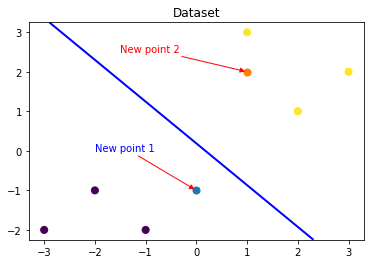

In [22]:
### 可视化预测新样本

plt.figure()
## new point 1
x_fearures_new1 = np.array([[0, -1]])
plt.scatter(x_fearures_new1[:,0],x_fearures_new1[:,1], s=50, cmap='viridis')
plt.annotate(s='New point 1',xy=(0,-1),xytext=(-2,0),color='blue',arrowprops=dict(arrowstyle='-|>',connectionstyle='arc3',color='red'))

## new point 2
x_fearures_new2 = np.array([[1, 2]])
plt.scatter(x_fearures_new2[:,0],x_fearures_new2[:,1], s=50, cmap='viridis')
plt.annotate(s='New point 2',xy=(1,2),xytext=(-1.5,2.5),color='red',arrowprops=dict(arrowstyle='-|>',connectionstyle='arc3',color='red'))

## 训练样本
plt.scatter(x_fearures[:,0],x_fearures[:,1], c=y_label, s=50, cmap='viridis')
plt.title('Dataset')

# 可视化决策边界
plt.contour(x_grid, y_grid, z_proba, [0.5], linewidths=2., colors='blue')

plt.show()

In [23]:
## 在训练集和测试集上分别利用训练好的模型进行预测
y_label_new1_predict = lr_clf.predict(x_fearures_new1)
y_label_new2_predict = lr_clf.predict(x_fearures_new2)
## 由于逻辑回归模型是概率预测模型（前文介绍的 p = p(y=1|x,\theta)）,所以我们可以利用 predict_proba 函数预测其概率
y_label_new1_predict_proba = lr_clf.predict_proba(x_fearures_new1)
y_label_new2_predict_proba = lr_clf.predict_proba(x_fearures_new2)

The New point 1 predict class:
 [0]
The New point 2 predict class:
 [1]
The New point 1 predict Probability of each class:
 [[0.69567724 0.30432276]]
The New point 2 predict Probability of each class:
 [[0.11983936 0.88016064]]


In [100]:
clf = LogisticRegression(random_state=0, solver='lbfgs')

In [101]:
clf.fit(x_train, y_train)

LogisticRegression(random_state=0)